In [10]:
import sys
!{sys.executable} -m pip install ta

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [92]:
import sys
!{sys.executable} -m pip install ta
import os
import pandas as pd
import ta

df = pd.read_csv("Resources/BTC-USD.csv")
df

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3513,2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,60636.855469,37840840057
3514,2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,58254.011719,48439780271
3515,2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,59123.433594,32711813559
3516,2024-05-03,59122.300781,63320.503906,58848.312500,62889.835938,62889.835938,33172023048


In [7]:
def label(t_horizon):
    for row in df.index:
        if row < len(df.index)-1:
            # Calculate the maximum value for the next t_horizon rows of high values.
            df.loc[row, f"Max_{t_horizon}"] = max(df.loc[(row + 1):(row + t_horizon), "High"]) 
            # Calculate the minimum value for the next t_horizon rows of low values.
            df.loc[row, f"Min_{t_horizon}"] = min(df.loc[(row+1):(row+t_horizon), "Low"])
            # Calculate the percentage gain from going long if exits at optimal price next 3 days
            df.loc[row, f"Max_{t_horizon}_Percent_Increase"] = ((df.loc[row, f"Max_{t_horizon}"] - df.loc[row, "Close"]) / df.loc[row, "Close"])
            # Calculate the percentage gain from going Short if exits at optimal price next 3 days 
            df.loc[row, f"Min_{t_horizon}_Percent_Increase"] = ((df.loc[row, "Close"] - df.loc[row, f"Min_{t_horizon}"]) / df.loc[row, "Close"])
            # What was the optimal move? (SHORT or LONG)
            df.loc[row, f"Choice_{t_horizon}"] = "LONG" if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else "SHORT"
            # What is the optimate gain?
            df.loc[row, f"Gain_{t_horizon}"] = df.loc[row, f"Max_{t_horizon}_Percent_Increase"] if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else df.loc[row, f"Min_{t_horizon}_Percent_Increase"]
# label(6)
label(1)
# label(2)
# label(3)
df

,Date,Open,High,Low,Close,Adj Close,Volume,rsi_5,MFI_5,p_ema_5,...,Vortex_13_neg,stochrsi_13,stochrsi_13_k,stochrsi_13_d,Max_1,Min_1,Max_1_Percent_Increase,Min_1_Percent_Increase,Choice_1,Gain_1
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,456.859985,413.104004,-0.001037,0.096713,SHORT,0.096713
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,...,0.003513,NaN,NaN,NaN,427.834991,384.532013,0.007999,0.094025,SHORT,0.094025
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,...,0.008106,NaN,NaN,NaN,423.295990,389.882996,0.072189,0.012444,LONG,0.072189
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,...,0.010498,NaN,NaN,NaN,412.425995,393.181000,0.008613,0.038452,SHORT,0.038452
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.737240,26.899820,0.9620,...,0.012395,NaN,NaN,NaN,406.915985,397.130005,0.020297,0.004240,LONG,0.020297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,60636.855469,37840840057,22.172868,13.930936,0.9661,...,0.993848,0.000000,0.285913,0.365340,60780.500000,56555.292969,0.002369,0.067312,SHORT,0.067312
3514,2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,58254.011719,48439780271,15.074003,11.971656,0.9509,...,1.092409,0.000000,0.174519,0.292376,59602.296875,56937.203125,0.023145,0.022605,LONG,0.023145
3515,2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,59123.433594,32711813559,25.894833,30.568663,0.9765,...,1.177974,0.165380,0.055127,0.171853,63320.503906,58848.312500,0.070988,0.004653,LONG,0.070988
3516,2024-05-03,59122.300781,63320.503906,58848.312500,62889.835938,62889.835938,33172023048,56.149840,36.652207,1.0255,...,1.060220,0.767951,0.311110,0.180252,64446.613281,62661.035156,0.024754,0.003638,LONG,0.024754


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,Min_3_Percent_Increase,Choice_3,Gain_3,Max_6,Min_6,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,427.834991,384.532013,0.007999,0.094025,SHORT,0.094025,441.557007,384.532013,0.040328,0.094025,SHORT,0.094025
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,423.295990,389.882996,0.072189,0.012444,LONG,0.072189,441.557007,389.882996,0.118443,0.012444,LONG,0.118443
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,441.557007,393.181000,0.079855,0.038452,LONG,0.079855,441.557007,393.181000,0.079855,0.038452,LONG,0.079855
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,441.557007,396.196991,0.107156,0.006579,LONG,0.107156,441.557007,396.196991,0.107156,0.006579,LONG,0.107156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335,65723.242188,59651.390625,0.034804,0.060797,SHORT,0.060797,66481.984375,59651.390625,0.046750,0.060797,SHORT,0.060797
3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570313,63843.570313,49920425401,66481.984375,63172.402344,0.041326,0.010513,LONG,0.041326,66481.984375,63172.402344,0.041326,0.010513,LONG,0.041326
3503,2024-04-20,63851.101563,65442.457031,63172.402344,64994.441406,64994.441406,23097485495,66481.984375,64277.722656,0.022887,0.011027,LONG,0.022887,66481.984375,64277.722656,0.022887,0.011027,LONG,0.022887
3504,2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,20506644853,66481.984375,64621.988281,0.023955,0.004692,LONG,0.023955,66481.984375,64621.988281,0.023955,0.004692,LONG,0.023955


In [22]:
# Clean NaN values
df = ta.utils.dropna(df)

In [23]:
# class exponential moving averages
ema_6 = ta.trend.ema_indicator(close = df["Close"], window = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], window = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], window = 24)
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["p_ema_6"] = df["p_ema_6"].round(4)
df["p_ema_12"] = df["p_ema_12"].round(4)
df["p_ema_24"] = df["p_ema_24"].round(4)

# class ta.momentum.RSIIndicator(close: pandas.core.series.Series, n: int = 14, fillna: bool = False)
rsi_14 = ta.momentum.RSIIndicator(df["Close"], window= 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], window= 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], window= 28)
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

df["TSI"] = ta.momentum.TSIIndicator(close= df["Close"], window_slow = 25, window_fast = 13, fillna = False).tsi()
df["FI"] =  ta.volume.ForceIndexIndicator(close= df["Close"], volume = df["Volume"], window = 13, fillna = False).force_index()
df["MFI"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = 14, fillna = False).money_flow_index()
df["UI_14"] = ta.volatility.UlcerIndex(close = df["Close"], window = 14, fillna = False).ulcer_index()
df["UI_7"] = ta.volatility.UlcerIndex(close = df["Close"], window = 7, fillna = False).ulcer_index()
df["UI_21"] = ta.volatility.UlcerIndex(close = df["Close"], window = 21, fillna = False).ulcer_index()

df["MI"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = 9, window_slow = 25, fillna = False).mass_index()
df["TRIX_15"] = ta.trend.TRIXIndicator(close = df["Close"], window = 15, fillna = False).trix()
df["TRIX_7"] = ta.trend.TRIXIndicator(close = df["Close"], window = 7, fillna = False).trix()
df["TRIX_21"] = ta.trend.TRIXIndicator(close = df["Close"], window = 21, fillna = False).trix()

# df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI", "MI", "TRIX"]]

df.dropna(inplace = True)

In [24]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,MI,TRIX_15,TRIX_7,TRIX_21,Max_2,Min_2,Max_2_Percent_Increase,Min_2_Percent_Increase,Choice_2,Gain_2
122,2015-01-17,207.834000,211.731003,194.875000,199.259995,199.259995,23469700,218.695007,194.505997,0.097536,...,27.258128,-1.115858,-2.587250,-0.728988,218.695007,194.505997,0.097536,0.023858,LONG,0.097536
123,2015-01-18,200.050003,218.695007,194.505997,210.339005,210.339005,30085100,227.787994,205.153000,0.082957,...,27.396083,-1.198375,-2.632558,-0.783269,216.727997,205.153000,0.030375,0.024655,LONG,0.030375
124,2015-01-19,211.470993,216.727997,207.317993,214.860992,214.860992,18658300,237.018997,205.153000,0.103127,...,27.477069,-1.266007,-2.541443,-0.833396,227.787994,205.153000,0.060164,0.045183,LONG,0.060164
125,2015-01-20,212.906998,215.240997,205.153000,211.315002,211.315002,24051100,237.018997,211.212006,0.121638,...,27.400011,-1.321506,-2.388502,-0.879809,237.018997,211.212006,0.121638,0.000487,LONG,0.121638
126,2015-01-21,211.378006,227.787994,211.212006,226.897003,226.897003,29924600,248.210007,225.195999,0.093933,...,27.247280,-1.354584,-2.097944,-0.918390,237.018997,225.195999,0.044611,0.007497,LONG,0.044611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,2024-02-25,51565.214844,51950.027344,51306.171875,51733.238281,51733.238281,15413239245,63913.132813,50931.031250,0.235437,...,24.904528,0.708290,0.510671,0.495645,57537.839844,50931.031250,0.112203,0.015507,LONG,0.112203
3449,2024-02-26,51730.539063,54938.175781,50931.031250,54522.402344,54522.402344,34074411896,63913.132813,54484.199219,0.172236,...,25.138851,0.704861,0.518796,0.509640,63913.132813,54484.199219,0.172236,0.000701,LONG,0.172236
3450,2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,57085.371094,49756832031,63913.132813,56738.425781,0.119606,...,25.508970,0.715816,0.639989,0.528213,63913.132813,56738.425781,0.119606,0.006078,LONG,0.119606
3451,2024-02-28,57071.097656,63913.132813,56738.425781,62504.789063,62504.789063,83239156760,63585.644531,60498.730469,0.017292,...,26.312082,0.756626,0.943549,0.558233,63585.644531,60498.730469,0.017292,0.032094,SHORT,0.032094


Automatically created module for IPython interactive environment
RandomForestClassifier, max_features='log2', GINI, MAX350
RandomForestClassifier, max_features='log2', GINI, M3
RandomForestClassifier, max_features=None, ENT, M5
RandomForestClassifier, max_features='log2', GINI, MAX350
[(500, 0.37383932176019374), (510, 0.37585789261203073), (520, 0.37747274929350016), (530, 0.3790876059749697), (540, 0.37828017763423494), (550, 0.37626160678239806), (560, 0.37585789261203073), (570, 0.37505046427129596), (580, 0.37383932176019374), (590, 0.37383932176019374), (600, 0.37383932176019374), (610, 0.37383932176019374), (620, 0.37505046427129596), (630, 0.3766653209527654), (640, 0.37505046427129596), (650, 0.3746467501009285), (660, 0.37585789261203073), (670, 0.37626160678239806), (680, 0.37182075090835687), (690, 0.3722244650787243), (700, 0.3722244650787243), (710, 0.37182075090835687), (720, 0.37262817924909164), (730, 0.37262817924909164), (740, 0.37383932176019374), (750, 0.3754541784

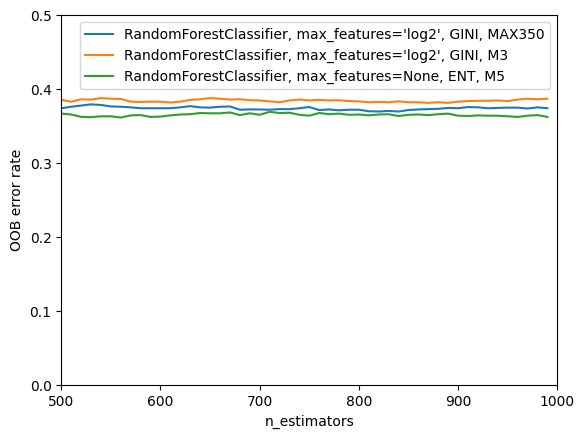

In [25]:
# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
# X, y = make_classification(n_samples=500, n_features=25,
#                           n_clusters_per_class=1, n_informative=15,
#                           random_state=RANDOM_STATE)

X = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI_7", "UI_14", "UI_21", "MI", "TRIX_7", "TRIX_15", "TRIX_21"]]

y = df["Choice_2"]

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.

ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2', GINI, MAX350",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE,
                               max_leaf_nodes=350,
                               n_jobs= -1)),
    ("RandomForestClassifier, max_features='log2', GINI, M3",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE,
                               max_leaf_nodes=250,
                               n_jobs= -1)),
    ("RandomForestClassifier, max_features=None, ENT, M5",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE,
                               criterion="entropy",
                               max_leaf_nodes=500,
                               n_jobs= -1))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate_test = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 500
max_estimators = 1000
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

for label, clf in ensemble_clfs:
    print(label)
    for i in range(min_estimators, max_estimators, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        oob_error_test = 1 - clf.score(X_test, y_test)
        error_rate_test[label].append((i, oob_error_test))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    print(label)
    print(clf_err)
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0.000,0.50)
plt.show()

RandomForestClassifier, max_features='log2', GINI, MAX350
[(500, 0.37383932176019374), (510, 0.37585789261203073), (520, 0.37747274929350016), (530, 0.3790876059749697), (540, 0.37828017763423494), (550, 0.37626160678239806), (560, 0.37585789261203073), (570, 0.37505046427129596), (580, 0.37383932176019374), (590, 0.37383932176019374), (600, 0.37383932176019374), (610, 0.37383932176019374), (620, 0.37505046427129596), (630, 0.3766653209527654), (640, 0.37505046427129596), (650, 0.3746467501009285), (660, 0.37585789261203073), (670, 0.37626160678239806), (680, 0.37182075090835687), (690, 0.3722244650787243), (700, 0.3722244650787243), (710, 0.37182075090835687), (720, 0.37262817924909164), (730, 0.37262817924909164), (740, 0.37383932176019374), (750, 0.3754541784416633), (760, 0.37141703673798954), (770, 0.3722244650787243), (780, 0.3710133225676221), (790, 0.37182075090835687), (800, 0.37182075090835687), (810, 0.36980218005652), (820, 0.36939846588615255), (830, 0.3702058942268873), (

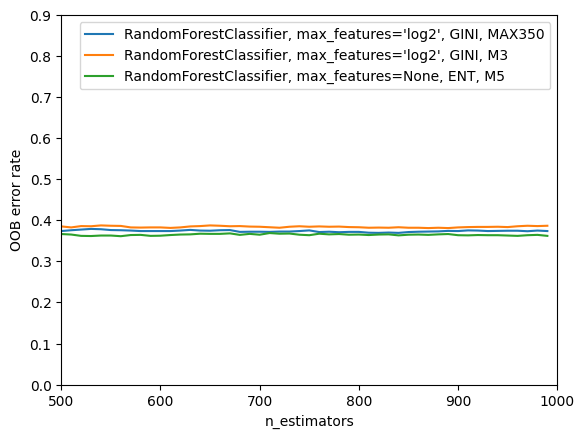

In [26]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    print(label)
    print(clf_err)
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0.00,0.90)
plt.show()

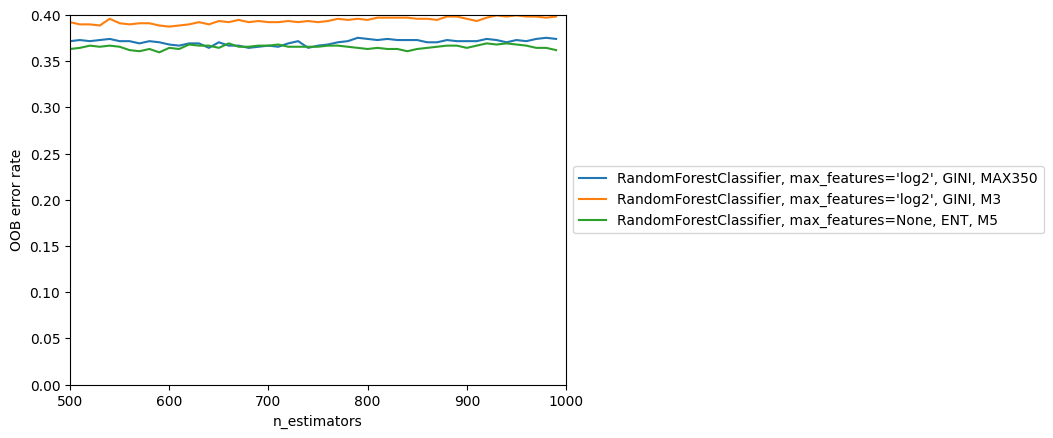

In [27]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate_test.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
# plt.legend(loc="lower right")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,0.40)
plt.show()

In [28]:
error_rate

OrderedDict([("RandomForestClassifier, max_features='log2', GINI, MAX350",
              [(500, 0.37383932176019374),
               (510, 0.37585789261203073),
               (520, 0.37747274929350016),
               (530, 0.3790876059749697),
               (540, 0.37828017763423494),
               (550, 0.37626160678239806),
               (560, 0.37585789261203073),
               (570, 0.37505046427129596),
               (580, 0.37383932176019374),
               (590, 0.37383932176019374),
               (600, 0.37383932176019374),
               (610, 0.37383932176019374),
               (620, 0.37505046427129596),
               (630, 0.3766653209527654),
               (640, 0.37505046427129596),
               (650, 0.3746467501009285),
               (660, 0.37585789261203073),
               (670, 0.37626160678239806),
               (680, 0.37182075090835687),
               (690, 0.3722244650787243),
               (700, 0.3722244650787243),
               (710, 0.3718

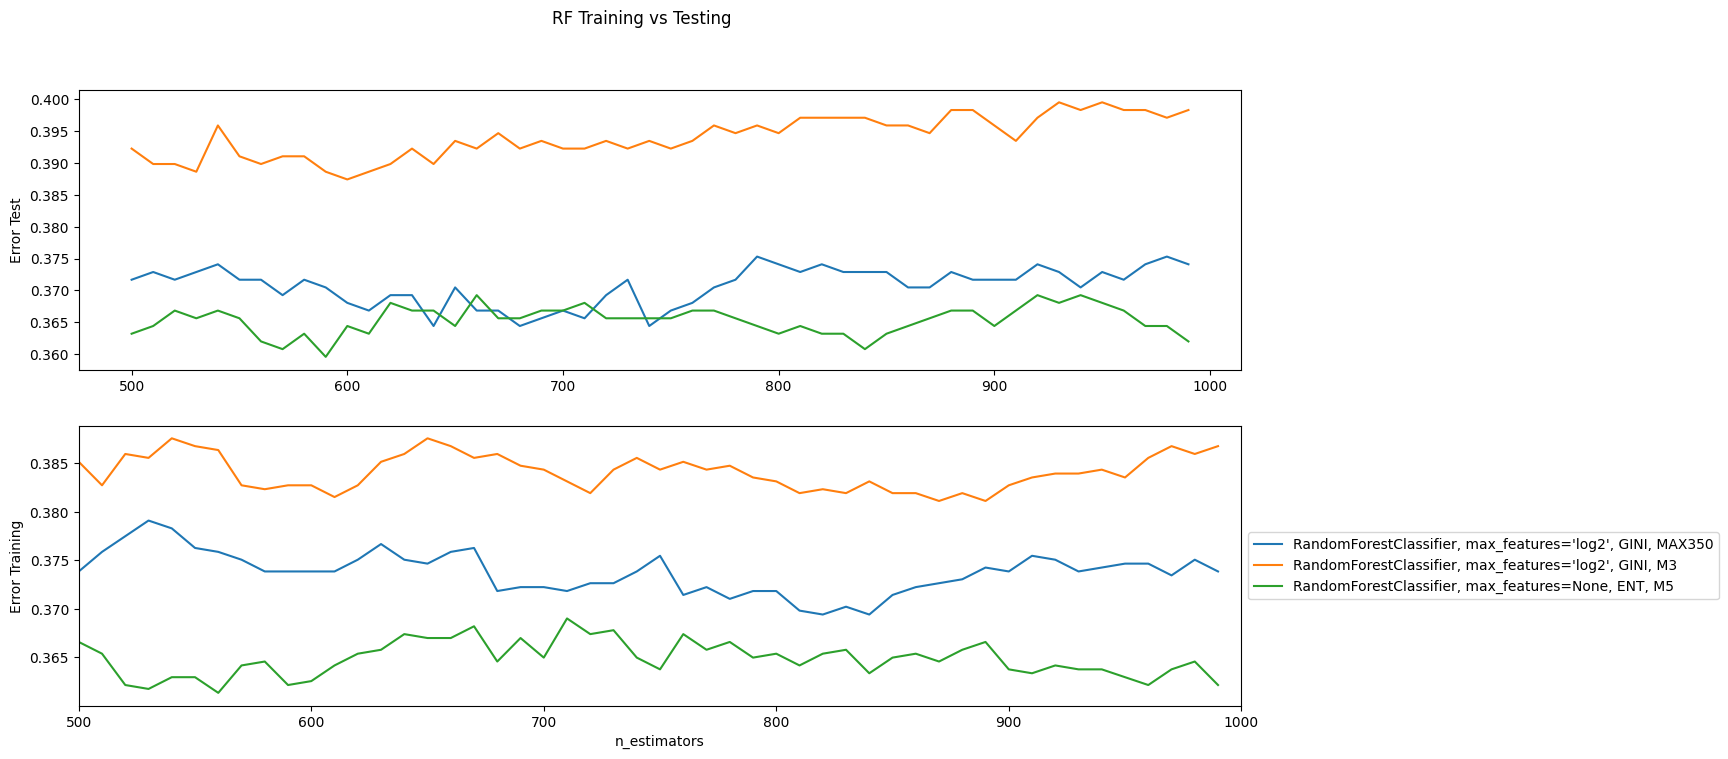

In [29]:
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle('RF Training vs Testing')

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate_test.items():
    xs, ys = zip(*clf_err)
    axs[0].plot(xs, ys, label=label)
    
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    axs[1].plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
axs[1].set_ylabel("Error Training")
axs[0].set_ylabel("Error Test")

# plt.legend(loc="outside")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(0,0.40)
plt.show()



indices [11 13 15 14 16 18 10 12  3  6  9 17  8  2  4  0  5  7  1]
X.shape[1] 19
X (3303, 19)
['MFI', 'UI_14', 'MI', 'UI_21', 'TRIX_7', 'TRIX_21', 'FI', 'UI_7', 'p_ema_6', 'rsi_7', 'TSI', 'TRIX_15', 'rsi_28', 'ema_24', 'p_ema_12', 'ema_6', 'p_ema_24', 'rsi_14', 'ema_12']


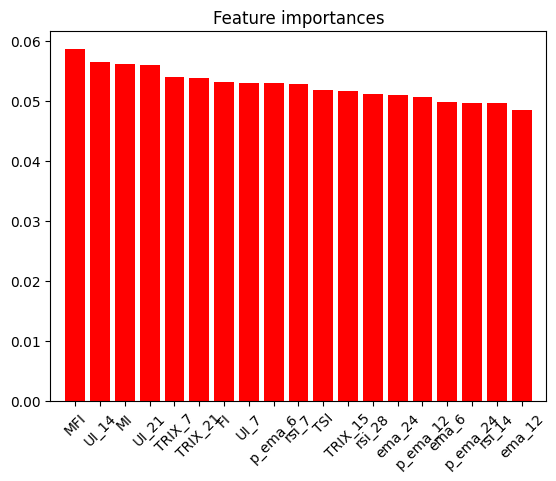

In [30]:
import numpy as np
labels = []
importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]
print('indices', indices)
# for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices,rotation = 45)
plt.xlim([-1, X.shape[1]])
print('X.shape[1]', X.shape[1])
print('X', X.shape)
for i in indices:
    labels.append(X.columns.values.tolist()[i])

print(labels)

plt.xticks(ticks = range(X.shape[1]), labels = labels)
#labels = [for i in indices ]
plt.show()

In [31]:
# We can sort the features by their importance
indicator_ranking = sorted(zip(clf.feature_importances_, X.columns.values.tolist()), reverse=True)
indicator_ranking

[(0.05857739070998913, 'MFI'),
 (0.056360507530754195, 'UI_14'),
 (0.056150964161043836, 'MI'),
 (0.05585312475517042, 'UI_21'),
 (0.05391988234814474, 'TRIX_7'),
 (0.05379832628831612, 'TRIX_21'),
 (0.05315985413791336, 'FI'),
 (0.05301095694528256, 'UI_7'),
 (0.05295208374173457, 'p_ema_6'),
 (0.052697177034297576, 'rsi_7'),
 (0.05183299223441401, 'TSI'),
 (0.05163447132174735, 'TRIX_15'),
 (0.05112106977186852, 'rsi_28'),
 (0.05087187197247426, 'ema_24'),
 (0.05057248286566426, 'p_ema_12'),
 (0.049793869681511914, 'ema_6'),
 (0.04963698361370976, 'p_ema_24'),
 (0.049556618117989004, 'rsi_14'),
 (0.048499372767974384, 'ema_12')]

In [32]:
X.columns.values.tolist()

['ema_6',
 'ema_12',
 'ema_24',
 'p_ema_6',
 'p_ema_12',
 'p_ema_24',
 'rsi_7',
 'rsi_14',
 'rsi_28',
 'TSI',
 'FI',
 'MFI',
 'UI_7',
 'UI_14',
 'UI_21',
 'MI',
 'TRIX_7',
 'TRIX_15',
 'TRIX_21']

In [16]:
labels = []
for i in indices:
    print(i)
    labels.append(X.columns.values.tolist()[i])
print(labels)

13
14
15
18
10
8
12
11
16
2
17
6
9
0
1
7
3
4
5
['UI_14', 'UI_21', 'MI', 'TRIX_21', 'FI', 'rsi_28', 'UI_7', 'MFI', 'TRIX_7', 'ema_24', 'TRIX_15', 'rsi_7', 'TSI', 'ema_6', 'ema_12', 'rsi_14', 'p_ema_6', 'p_ema_12', 'p_ema_24']


In [17]:
clf.feature_importances_

array([0.05028813, 0.04888873, 0.05210053, 0.0477793 , 0.04753432,
       0.04607539, 0.05129255, 0.04839253, 0.05502916, 0.05096638,
       0.05533225, 0.0534395 , 0.05394823, 0.05997279, 0.05962992,
       0.05775864, 0.05329023, 0.05155991, 0.05672151])

In [18]:
indices

array([13, 14, 15, 18, 10,  8, 12, 11, 16,  2, 17,  6,  9,  0,  1,  7,  3,
        4,  5], dtype=int64)

In [19]:
print(f"The error rate of our model is: {clf.oob_score_}")

The error rate of our model is: 0.7077042198993418


In [20]:
x = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI_7", "UI_14", "UI_21", "MI", "TRIX_7", "TRIX_15", "TRIX_21"]]

x["model_predictions"] = clf.predict(x)
x["target_values"] = y

C:\Users\12252\AppData\Local\Temp\ipykernel_1384\2479812998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["model_predictions"] = clf.predict(x)
C:\Users\12252\AppData\Local\Temp\ipykernel_1384\2479812998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["target_values"] = y


In [21]:
x

,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,TSI,...,MFI,UI_7,UI_14,UI_21,MI,TRIX_7,TRIX_15,TRIX_21,model_predictions,target_values
61,387.353453,379.307303,371.404686,0.9999,0.9791,0.9587,56.241599,55.714363,51.793861,6.492837,...,80.289893,6.617924,6.321000,12.109154,26.072018,1.016366,0.124902,-0.067044,SHORT,SHORT
62,383.880466,378.675102,371.708151,1.0231,1.0093,0.9907,48.299437,51.348107,49.428544,5.592164,...,72.677150,7.900755,5.981006,12.136574,26.280938,0.841200,0.163903,-0.040832,SHORT,SHORT
63,382.930331,378.964316,372.415898,1.0062,0.9958,0.9786,51.784573,53.085274,50.457946,5.412368,...,72.773710,8.686238,6.414317,11.814313,26.339657,0.677937,0.193473,-0.017164,SHORT,SHORT
64,375.761664,375.714421,371.249826,1.0501,1.0500,1.0375,38.834317,45.643197,46.312567,2.853158,...,66.941828,9.477031,7.608168,11.911905,26.396654,0.439782,0.202764,-0.000621,LONG,SHORT
65,368.643472,371.888816,369.617679,1.0507,1.0600,1.0535,35.634099,43.616251,45.129051,0.158208,...,64.866198,9.877240,8.811578,12.013897,26.439475,0.172685,0.193969,0.008738,LONG,LONG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,64208.742409,65814.444593,66644.274019,1.0478,1.0741,1.0876,29.011040,38.816389,47.045803,-6.134209,...,44.977336,9.118055,7.378897,6.926712,24.232501,-0.581420,0.037122,0.268854,LONG,LONG
3501,64009.888551,65460.338333,66393.752410,1.0078,1.0307,1.0454,40.835688,44.081793,49.481194,-7.130631,...,44.871538,9.313639,7.905915,7.321800,24.304354,-0.653764,-0.010739,0.233726,SHORT,SHORT
3502,63962.369054,65211.604792,66189.737842,1.0019,1.0214,1.0367,42.489160,44.838143,49.835163,-7.701979,...,52.549145,9.080401,8.320504,7.637392,24.423736,-0.666842,-0.053122,0.200030,SHORT,LONG
3503,64257.246869,65178.195040,66094.114127,0.9887,1.0028,1.0169,48.347989,47.498653,51.071974,-7.395681,...,52.706437,8.102775,8.633001,7.833506,24.516172,-0.615675,-0.086634,0.169365,LONG,LONG


In [7]:
df = pd.read_csv("Resources/BTC-USD.csv")

# class exponential moving averages
ema_6 = ta.trend.ema_indicator(close = df["Close"], window = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], window = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], window = 24)
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["p_ema_6"] = df["p_ema_6"].round(4)
df["p_ema_12"] = df["p_ema_12"].round(4)
df["p_ema_24"] = df["p_ema_24"].round(4)

# class ta.momentum.RSIIndicator(close: pandas.core.series.Series, n: int = 14, fillna: bool = False)
rsi_14 = ta.momentum.RSIIndicator(df["Close"], window= 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], window= 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], window= 28)
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

df["TSI"] = ta.momentum.TSIIndicator(close= df["Close"], window_slow = 25, window_fast = 13, fillna = False).tsi()
df["FI"] =  ta.volume.ForceIndexIndicator(close= df["Close"], volume = df["Volume"], window = 13, fillna = False).force_index()
df["MFI"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = 14, fillna = False).money_flow_index()
df["UI_14"] = ta.volatility.UlcerIndex(close = df["Close"], window = 14, fillna = False).ulcer_index()
df["UI_7"] = ta.volatility.UlcerIndex(close = df["Close"], window = 7, fillna = False).ulcer_index()
df["UI_21"] = ta.volatility.UlcerIndex(close = df["Close"], window = 21, fillna = False).ulcer_index()

df["MI"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = 9, window_slow = 25, fillna = False).mass_index()
df["TRIX_15"] = ta.trend.TRIXIndicator(close = df["Close"], window = 15, fillna = False).trix()
df["TRIX_7"] = ta.trend.TRIXIndicator(close = df["Close"], window = 7, fillna = False).trix()
df["TRIX_21"] = ta.trend.TRIXIndicator(close = df["Close"], window = 21, fillna = False).trix()

df.dropna(inplace=True)
df_subset = df.tail(n = 1)
df_subset

,Date,Open,High,Low,Close,Adj Close,Volume,ema_6,ema_12,ema_24,...,TSI,FI,MFI,UI_14,UI_7,UI_21,MI,TRIX_15,TRIX_7,TRIX_21
3506,2024-04-23,66845.789063,67199.242188,65924.75,66324.34375,66324.34375,25382909952,65472.044755,65542.844858,66088.207221,...,-4.828411,-1.100129e+12,57.674506,9.165068,5.310744,7.986905,24.50941,-0.134432,-0.275739,0.098761


In [8]:
x = df_subset[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI_7", "UI_14", "UI_21", "MI", "TRIX_7", "TRIX_15", "TRIX_21"]]
clf.predict(x)[0]

NameError: name 'clf' is not defined

In [31]:
from joblib import dump, load
dump(clf, './arbitra-btc-1D-2D-OPTI.joblib')


['./arbitra-btc.joblib']

In [34]:
from joblib import dump, load
import sys
!{sys.executable} -m pip install ta
!{sys.executable} -m pip install requests
import os
import pandas as pd
import ta
import csv
import requests
import datetime
date = datetime.datetime.now().strftime("%Y%m%D")
print(date)
CSV_URL = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1714659657&interval=1d&events=history&includeAdjustedClose=true'
current_btc_history = f'./Resources/BTC-USD-{date}'
# with requests.Session() as s:
#     download = s.get(CSV_URL)

#     decoded_content = download.content.decode('utf-8')

#     cr = csv.reader(decoded_content.splitlines(), delimiter=',')

# with open(current_btc_history, 'w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerows(cr)
    # my_list = list(cr)
    # for row in my_list:
    #     print(row)

df = pd.read_csv("Resources/BTC-USD.csv")

# class exponential moving averages
ema_6 = ta.trend.ema_indicator(close = df["Close"], window = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], window = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], window = 24)
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["p_ema_6"] = df["p_ema_6"].round(4)
df["p_ema_12"] = df["p_ema_12"].round(4)
df["p_ema_24"] = df["p_ema_24"].round(4)

# class ta.momentum.RSIIndicator(close: pandas.core.series.Series, n: int = 14, fillna: bool = False)
rsi_14 = ta.momentum.RSIIndicator(df["Close"], window= 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], window= 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], window= 28)
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

df["TSI"] = ta.momentum.TSIIndicator(close= df["Close"], window_slow = 25, window_fast = 13, fillna = False).tsi()
df["FI"] =  ta.volume.ForceIndexIndicator(close= df["Close"], volume = df["Volume"], window = 13, fillna = False).force_index()
df["MFI"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = 14, fillna = False).money_flow_index()
df["UI_14"] = ta.volatility.UlcerIndex(close = df["Close"], window = 14, fillna = False).ulcer_index()
df["UI_7"] = ta.volatility.UlcerIndex(close = df["Close"], window = 7, fillna = False).ulcer_index()
df["UI_21"] = ta.volatility.UlcerIndex(close = df["Close"], window = 21, fillna = False).ulcer_index()

df["MI"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = 9, window_slow = 25, fillna = False).mass_index()
df["TRIX_15"] = ta.trend.TRIXIndicator(close = df["Close"], window = 15, fillna = False).trix()
df["TRIX_7"] = ta.trend.TRIXIndicator(close = df["Close"], window = 7, fillna = False).trix()
df["TRIX_21"] = ta.trend.TRIXIndicator(close = df["Close"], window = 21, fillna = False).trix()

df.dropna(inplace=True)
df_subset = df.tail(n = 10)

x = df_subset[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI_7", "UI_14", "UI_21", "MI", "TRIX_7", "TRIX_15", "TRIX_21"]]
clf_load = load('arbitra-btc.joblib')
signal = clf_load.predict(x)

df_subset["Signal"] = signal

df_subset[["Date","Open","High","Low","Close","Signal"]]

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


20240505/04/24


You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
C:\Users\12252\AppData\Local\Temp\ipykernel_14356\1612228257.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Signal"] = signal


,Date,Open,High,Low,Close,Signal
3508,2024-04-25,64275.019531,65275.207031,62783.632813,64481.707031,SHORT
3509,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320313,SHORT
3510,2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,SHORT
3511,2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,SHORT
3512,2024-04-29,63106.363281,64174.878906,61795.457031,63841.121094,SHORT
3513,2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,LONG
3514,2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,SHORT
3515,2024-05-02,58253.703125,59602.296875,56937.203125,59123.433594,LONG
3516,2024-05-03,59122.300781,63320.503906,58848.312500,62889.835938,SHORT
3517,2024-05-04,62911.718750,64446.613281,62661.035156,64050.761719,LONG


In [39]:
# evaluate xgboost ensemble for regression
!{sys.executable} -m pip install xgboost
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# class exponential moving averages
ema_6 = ta.trend.ema_indicator(close = df["Close"], window = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], window = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], window = 24)
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["p_ema_6"] = df["p_ema_6"].round(4)
df["p_ema_12"] = df["p_ema_12"].round(4)
df["p_ema_24"] = df["p_ema_24"].round(4)

# class ta.momentum.RSIIndicator(close: pandas.core.series.Series, n: int = 14, fillna: bool = False)
rsi_14 = ta.momentum.RSIIndicator(df["Close"], window= 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], window= 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], window= 28)
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

df["TSI"] = ta.momentum.TSIIndicator(close= df["Close"], window_slow = 25, window_fast = 13, fillna = False).tsi()
df["FI"] =  ta.volume.ForceIndexIndicator(close= df["Close"], volume = df["Volume"], window = 13, fillna = False).force_index()
df["MFI"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = 14, fillna = False).money_flow_index()
df["UI_14"] = ta.volatility.UlcerIndex(close = df["Close"], window = 14, fillna = False).ulcer_index()
df["UI_7"] = ta.volatility.UlcerIndex(close = df["Close"], window = 7, fillna = False).ulcer_index()
df["UI_21"] = ta.volatility.UlcerIndex(close = df["Close"], window = 21, fillna = False).ulcer_index()

df["MI"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = 9, window_slow = 25, fillna = False).mass_index()
df["TRIX_15"] = ta.trend.TRIXIndicator(close = df["Close"], window = 15, fillna = False).trix()
df["TRIX_7"] = ta.trend.TRIXIndicator(close = df["Close"], window = 7, fillna = False).trix()
df["TRIX_21"] = ta.trend.TRIXIndicator(close = df["Close"], window = 21, fillna = False).trix()

# df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI", "MI", "TRIX"]]

df.dropna(inplace = True)

# define dataset
X = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI_7", "UI_14", "UI_21", "MI", "TRIX_7", "TRIX_15", "TRIX_21"]]

y = df["Choice_2"]

# X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


ValueError: could not convert string to float: 'SHORT'

In [43]:
!{sys.executable} -m pip install xgboost
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBClassifier

# class exponential moving averages
ema_6 = ta.trend.ema_indicator(close = df["Close"], window = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], window = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], window = 24)
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["p_ema_6"] = df["p_ema_6"].round(4)
df["p_ema_12"] = df["p_ema_12"].round(4)
df["p_ema_24"] = df["p_ema_24"].round(4)

# class ta.momentum.RSIIndicator(close: pandas.core.series.Series, n: int = 14, fillna: bool = False)
rsi_14 = ta.momentum.RSIIndicator(df["Close"], window= 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], window= 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], window= 28)
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()

df["TSI"] = ta.momentum.TSIIndicator(close= df["Close"], window_slow = 25, window_fast = 13, fillna = False).tsi()
df["FI"] =  ta.volume.ForceIndexIndicator(close= df["Close"], volume = df["Volume"], window = 13, fillna = False).force_index()
df["MFI"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = 14, fillna = False).money_flow_index()
df["UI_14"] = ta.volatility.UlcerIndex(close = df["Close"], window = 14, fillna = False).ulcer_index()
df["UI_7"] = ta.volatility.UlcerIndex(close = df["Close"], window = 7, fillna = False).ulcer_index()
df["UI_21"] = ta.volatility.UlcerIndex(close = df["Close"], window = 21, fillna = False).ulcer_index()

df["MI"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = 9, window_slow = 25, fillna = False).mass_index()
df["TRIX_15"] = ta.trend.TRIXIndicator(close = df["Close"], window = 15, fillna = False).trix()
df["TRIX_7"] = ta.trend.TRIXIndicator(close = df["Close"], window = 7, fillna = False).trix()
df["TRIX_21"] = ta.trend.TRIXIndicator(close = df["Close"], window = 21, fillna = False).trix()

# df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI", "MI", "TRIX"]]

df.dropna(inplace = True)

# define dataset
X = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "TSI", "FI", "MFI", "UI_7", "UI_14", "UI_21", "MI", "TRIX_7", "TRIX_15", "TRIX_21"]]

y = df["Choice_2"].replace(["LONG","SHORT"],[1,0])

# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Accuracy: 0.615 (0.033)


In [54]:
# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
 models = dict()
 trees = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
 for n in trees:
    models[str(n)] = XGBClassifier(n_estimators=n)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1000 0.631 (0.026)
>2000 0.633 (0.025)
>3000 0.632 (0.026)
>4000 0.634 (0.026)
>5000 0.635 (0.026)
>6000 0.634 (0.027)
>7000 0.635 (0.026)
>8000 0.635 (0.026)
>9000 0.635 (0.025)


KeyboardInterrupt: 

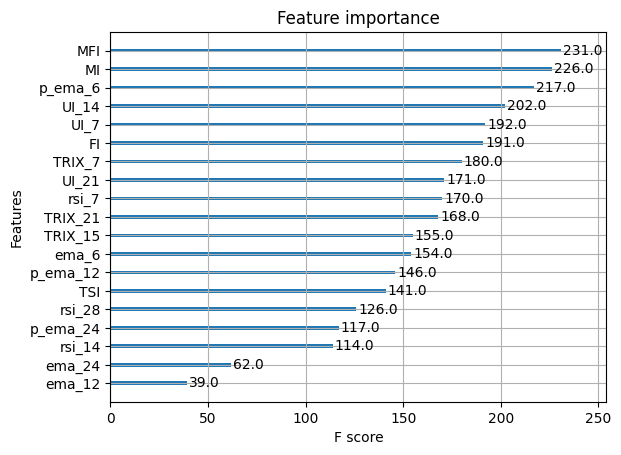

In [48]:
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X,y)

plot_importance(model)
pyplot.show()

>1 0.548 (0.020)
>2 0.560 (0.026)
>3 0.576 (0.025)
>4 0.597 (0.029)
>5 0.602 (0.034)
>6 0.615 (0.033)
>7 0.619 (0.022)
>8 0.623 (0.027)
>9 0.624 (0.029)
>10 0.628 (0.026)


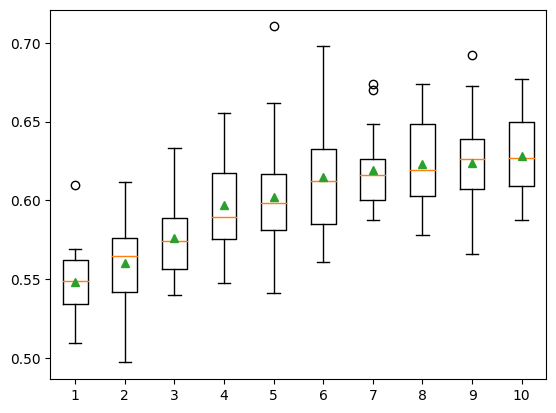

In [50]:
# explore xgboost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(1,11):
    models[str(i)] = XGBClassifier(max_depth=i)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1000 0.601 (0.027)
>0.2000 0.610 (0.025)
>0.3000 0.615 (0.033)
>0.4000 0.619 (0.030)
>0.5000 0.615 (0.029)
>0.6000 0.622 (0.028)
>0.7000 0.621 (0.028)
>0.8000 0.614 (0.029)
>0.9000 0.626 (0.036)
>1.0000 0.613 (0.027)


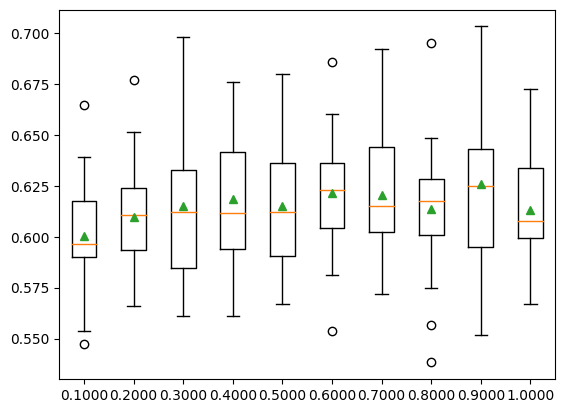

In [52]:
# explore xgboost learning rate effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
 models = dict()
 rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
 for r in rates:
    key = '%.4f' % r
    models[key] = XGBClassifier(eta=r)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.540 (0.025)
>0.2 0.571 (0.018)
>0.3 0.591 (0.027)
>0.4 0.602 (0.025)
>0.5 0.607 (0.032)
>0.6 0.606 (0.022)
>0.7 0.612 (0.030)
>0.8 0.615 (0.025)
>0.9 0.618 (0.030)
>1.0 0.615 (0.033)


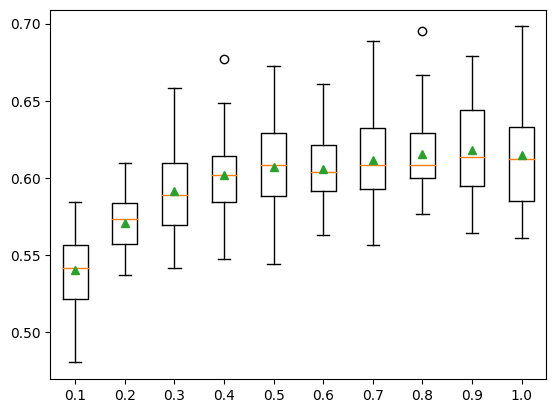

In [53]:
# explore xgboost subsample ratio effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in arange(0.1, 1.1, 0.1):
    key = '%.1f' % i
    models[key] = XGBClassifier(subsample=i)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

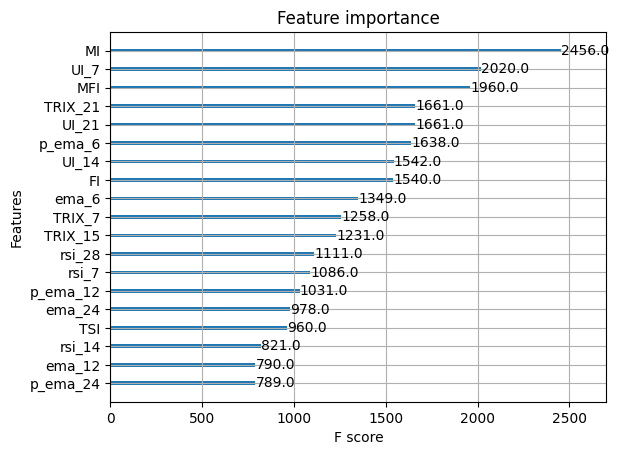

>10000 0.635 (0.025)


In [56]:
# subsample=0.8
# eta=0.6
# max_depth=10
# n_estimators=5000

from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier(subsample=0.8, eta=0.6, max_depth=10, n_estimators=5000)
model.fit(X,y)

plot_importance(model)
pyplot.show()

# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

score = evaluate_model(model)

print('>%s %.3f (%.3f)' % (mean(scores), std(scores)))


In [ ]:
# subsample=0.8
# eta=0.6
# max_depth=10
# n_estimators=5000
# colsample_bytree=0.50

from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier(subsample=0.8, eta=0.6, max_depth=10, n_estimators=5000)
model.fit(X,y)

plot_importance(model)
pyplot.show()

# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

score = evaluate_model(model)

print('>%s %.3f (%.3f)' % (mean(scores), std(scores)))

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
C:\Users\12252\AppData\Local\Temp\ipykernel_14356\2728075087.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'KAMA_{i}'] = (df["Close"] / ta.momentum.KAMAIndicator(close = df["Close"], window=i).kama()).round(4)
C:\Users\12252\AppData\Local\Temp\ipykernel_14356\2728075087.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'o_rsi_{i}'] = ta.momentum.RSIIndicator(df["Open"], 

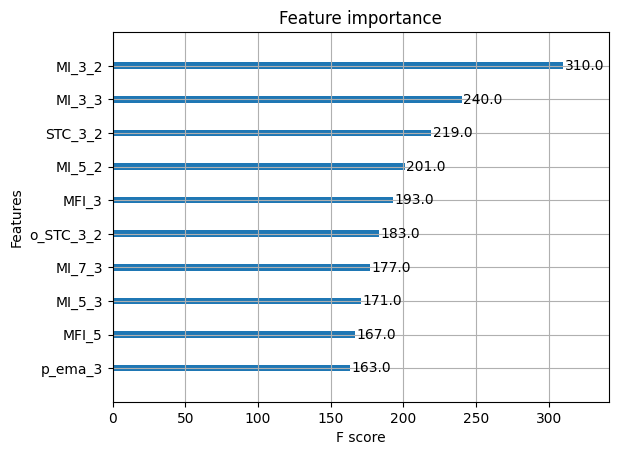

(0.49407407407407417, 0.04535940910674467)


In [131]:
import sys
!{sys.executable} -m pip install ta
import os
import pandas as pd
import ta

df = pd.read_csv("Resources/BTC-USD.csv")
indicator_names = []
for i in range(3,21,2):
    df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i).trix()
    df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()
    df[f'KAMA_{i}'] = (df["Close"] / ta.momentum.KAMAIndicator(close = df["Close"], window=i).kama()).round(4)
    # close with lag 1 day
    df[f'o_rsi_{i}'] = ta.momentum.RSIIndicator(df["Open"], window= i).rsi()
    df[f'o_p_ema_{i}'] = (df["Open"] / ta.trend.ema_indicator(close = df["Open"], window = i)).round(4)
    df[f"o_MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"o_MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"o_TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Open"], window = i).trix()
    df[f"o_STC_{i}_2"] = ta.trend.STCIndicator(close = df["Open"], window_fast=i, window_slow=i*2).stc()
    df[f'o_KAMA_{i}'] = (df["Close"] / ta.momentum.KAMAIndicator(close = df["Open"], window=i).kama()).round(4)

    indicator_names.append(f'rsi_{i}')
    indicator_names.append(f"MFI_{i}")
    indicator_names.append(f'p_ema_{i}')
    indicator_names.append(f"MI_{i}_2")
    indicator_names.append(f"MI_{i}_3")
    indicator_names.append(f"TRIX_{i}")
    indicator_names.append(f"STC_{i}_2")
    indicator_names.append(f'KAMA_{i}')

    # Cloase lag 1 day
    indicator_names.append(f'o_rsi_{i}')
    indicator_names.append(f'o_p_ema_{i}')
    indicator_names.append(f"o_TRIX_{i}")
    indicator_names.append(f"o_STC_{i}_2")
    indicator_names.append(f'o_KAMA_{i}')


for i in range(35,43,2):
    df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i, fillna = False).trix()
    df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()

    indicator_names.append(f'rsi_{i}')
    indicator_names.append(f"MFI_{i}")
    indicator_names.append(f'p_ema_{i}')
    indicator_names.append(f"MI_{i}_2")
    indicator_names.append(f"MI_{i}_3")
    indicator_names.append(f"TRIX_{i}")
    indicator_names.append(f"STC_{i}_2")

label(1)
df.dropna(inplace=True)
X = df[indicator_names].tail(1800)
y = df['Choice_1'].replace(['LONG','SHORT'], [1,0]).tail(1800)

# subsample=0.8
# eta=0.6
# max_depth=10
# n_estimators=5000

from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier(subsample=0.8, eta=0.6, max_depth=10, n_estimators=5000)
model.fit(X,y)

plot_importance(model, max_num_features=10)
pyplot.show()

# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

score = evaluate_model(model)

print((mean(score), std(score)))

In [31]:
import sys
!{sys.executable} -m pip install ta
import os
import pandas as pd
import ta
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std

df = pd.read_csv("Resources/BTC-USD.csv")
indicator_names = []
for i in range(5,15,2):
    df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i).trix()
    df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()
    df[f'KAMA_{i}'] = (df["Close"] / ta.momentum.KAMAIndicator(close = df["Close"], window=i).kama()).round(4)
    # df[f'Vortex_{i}_Vortex'] = ta.trend.VortexIndicator(low = df["Low"], high= df["High"], close= df["Close"], window=i, fillna = True).vortex_diff()
    df[f'Vortex_{i}_pos'] = ta.trend.VortexIndicator(low = df["Low"], high= df["High"], close= df["Close"], window=i, fillna = True).vortex_indicator_pos()
    df[f'Vortex_{i}_neg'] = ta.trend.VortexIndicator(low = df["Low"], high= df["High"], close= df["Close"], window=i, fillna = True).vortex_indicator_neg()
    df[f'stochrsi_{i}'] = ta.momentum.StochRSIIndicator(close= df["Close"], window=i, smooth1=3, smooth2=3, fillna=False).stochrsi()
    df[f'stochrsi_{i}_k'] = ta.momentum.StochRSIIndicator(close= df["Close"], window=i, smooth1=3, smooth2=3, fillna=False).stochrsi_k()
    df[f'stochrsi_{i}_d'] = ta.momentum.StochRSIIndicator(close= df["Close"], window=i, smooth1=3, smooth2=3, fillna=False).stochrsi_d()

    indicator_names.append(f'rsi_{i}')
    indicator_names.append(f"MFI_{i}")
    indicator_names.append(f'p_ema_{i}')
    indicator_names.append(f"MI_{i}_2")
    indicator_names.append(f"MI_{i}_3")
    indicator_names.append(f"TRIX_{i}")
    indicator_names.append(f"STC_{i}_2")
    indicator_names.append(f'KAMA_{i}')
    indicator_names.append(f'Vortex_{i}_pos')
    indicator_names.append(f'Vortex_{i}_neg')
    indicator_names.append(f'stochrsi_{i}')
    indicator_names.append(f'stochrsi_{i}_k')
    indicator_names.append(f'stochrsi_{i}_d')


# for i in range(35,41,2):
    # df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    # df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    # df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    # df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    # df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    # df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i, fillna = False).trix()
    # df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()

    # indicator_names.append(f'rsi_{i}')
    # indicator_names.append(f"MFI_{i}")
    # indicator_names.append(f'p_ema_{i}')
    # indicator_names.append(f"MI_{i}_2")
    # indicator_names.append(f"MI_{i}_3")
    # indicator_names.append(f"TRIX_{i}")
    # indicator_names.append(f"STC_{i}_2")

label(1)
df.dropna(inplace=True)
# X = df[indicator_names]
X = df[out]
y = df['Max_1_Percent_Increase']

rates = [0.3,0.4,0.5,0.6,0.7]
subsample = [0.3,0.4,0.5,0.6,0.7,0.8]
trees = [100, 200, 300, 400]
depth = [3,5,7]
features = [0.3,0.6,0.7,0.9]

# rates = [0.1,1.0]
# subsample = [0.1,1.0]
# trees = [50, 100]
# depth = [1,2,3]
# features = [0.1,0.2]

models = dict()

for r in rates:
    for s in subsample:
        for t in trees:
            for d in depth:
                for f in features:
                    key = f'R{r}-S{s}-T{t}-D{d}-F{f}'
                    models[key] = XGBRegressor(subsample=s, eta=r, max_depth=d, n_estimators=t, colsample_bytree=f)

# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 return absolute(scores)
 
# get the models to evaluate
# models = get_models()
# evaluate the models and store results
results, names = list(), list()
best_name = ""
best_score = 100000
best_names_contendors = []
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 if (mean(scores) < best_score):
    print((name, mean(scores), std(scores)))
    best_score = mean(scores)
    best_name = name
    best_names_contendors.append(name)
# plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()


You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


('R0.3-S0.3-T100-D3-F0.3', 0.019491618171017567, 0.0007216643746637695)
('R0.3-S0.3-T100-D3-F0.9', 0.01932816305995122, 0.0007414414295304482)
('R0.3-S0.4-T100-D3-F0.3', 0.019029483237243256, 0.0006723558581015299)
('R0.3-S0.5-T100-D3-F0.3', 0.01872065372690407, 0.0005447916809906307)
('R0.3-S0.6-T100-D3-F0.3', 0.01862272842181388, 0.000675625322598468)
('R0.3-S0.7-T100-D3-F0.3', 0.01837642656474376, 0.000640430976870565)
('R0.3-S0.8-T100-D3-F0.3', 0.018278118798462605, 0.0006354580090449922)


KeyboardInterrupt: 

In [108]:
import sys
!{sys.executable} -m pip install pmdarima
import pmdarima as pm

df_arima = pd.read_csv("Resources/BTC-USD.csv")
for row in df_arima.index:
    df_arima.loc[row, f"df_arima_0"] =  df_arima.loc[row, "High"] if row % 2 == 0 else df_arima.loc[row, "Low"]
    df_arima.loc[row, f"df_arima_1"] =  df_arima.loc[row, "High"] if row % 2 == 1 else df_arima.loc[row, "Low"]

import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_arima["df_arima_0"])

smodel.summary()

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3518
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -28710.994
Date:                Sun, 05 May 2024   AIC                          57435.987
Time:                        00:25:12   BIC                          57479.145
Sample:                             0   HQIC                         57451.386
                               - 3518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3555      0.014     24.801      0.000       0.327       0.384
ar.L2          0.4202      0.013     32.710      0.000       0.395       0.445
ar.L3         -0.9313      0.016    -56.706      0.000      -0.964      -0.899
ma.L1         -0.4609      0.013    -35.252      0.000      -0.486      -0.435
ma.L2         -0.2796      0.012    -23.713      0.000      -0.303      -0.257
ma.L3          0.8663      0.013     67.895      0.000       0.841       0.891
sigma2      7.415e+05   6021.345    123.146      0.000     7.3e+05    7.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            108708.91
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):             185.66   Skew:                            -1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
import pmdarima as pm
# Forecast
n_periods = 3
forecast = smodel.predict(n_periods=7)
forecast

3518    65394.812621
3519    62563.048874
3520    65448.561513
3521    62738.591464
3522    65624.813013
3523    62824.956827
3524    65566.090351
dtype: float64

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

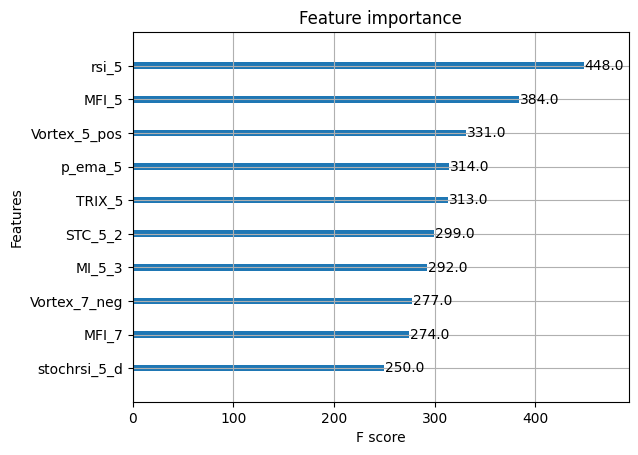

In [12]:
from xgboost import plot_importance
df.dropna(inplace=True)
X = df[indicator_names]
y = df['Min_1_Percent_Increase']

# R0.3-S0.8-T1000-D7-F0.3
r=0.3
s=0.8
t=1000
d=7
f=0.3

model = XGBRegressor(subsample=s, eta=r, max_depth=d, n_estimators=t, colsample_bytree=f)
model.fit(X,y)
plot_importance(model, max_num_features=10)

In [13]:
inputX = X.tail(1)
model.predict(inputX)

array([0.00365531], dtype=float32)

In [14]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume,rsi_5,MFI_5,p_ema_5,...,Vortex_13_neg,stochrsi_13,stochrsi_13_k,stochrsi_13_d,Max_1,Min_1,Max_1_Percent_Increase,Min_1_Percent_Increase,Choice_1,Gain_1
3516,2024-05-03,59122.300781,63320.503906,58848.3125,62889.835938,62889.835938,33172023048,56.14984,36.652207,1.0255,...,1.06022,0.767951,0.31111,0.180252,64446.613281,62661.035156,0.024754,0.003638,LONG,0.024754


In [30]:
import sys
!{sys.executable} -m pip install ta
import os
import pandas as pd
import ta
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute

df = pd.read_csv("Resources/BTC-USD.csv")
indicator_names = []
for i in range(5,13,2):
    df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i).trix()
    df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()
    df[f'KAMA_{i}'] = (df["Close"] / ta.momentum.KAMAIndicator(close = df["Close"], window=i).kama()).round(4)

    indicator_names.append(f'rsi_{i}')
    indicator_names.append(f"MFI_{i}")
    indicator_names.append(f'p_ema_{i}')
    indicator_names.append(f"MI_{i}_2")
    indicator_names.append(f"MI_{i}_3")
    indicator_names.append(f"TRIX_{i}")
    indicator_names.append(f"STC_{i}_2")
    indicator_names.append(f'KAMA_{i}')

for i in range(35,41,2):
    df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i, fillna = False).trix()
    df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()

    indicator_names.append(f'rsi_{i}')
    indicator_names.append(f"MFI_{i}")
    indicator_names.append(f'p_ema_{i}')
    indicator_names.append(f"MI_{i}_2")
    indicator_names.append(f"MI_{i}_3")
    indicator_names.append(f"TRIX_{i}")
    indicator_names.append(f"STC_{i}_2")

label(1)
df.dropna(inplace=True)
# X = df[indicator_names]
X = df[out]
y = df['Min_1_Percent_Increase']

rates = [0.3,0.4,0.5,0.6,0.7]
subsample = [0.3,0.4,0.5,0.6,0.7,0.8]
trees = [500, 1000]
depth = [3,5,7]
features = [0.3,0.6,0.7,0.9]

# rates = [0.1,1.0]
# subsample = [0.1,1.0]
# trees = [50, 100]
# depth = [1,2,3]
# features = [0.1,0.2]

models = dict()

for r in rates:
    for s in subsample:
        for t in trees:
            for d in depth:
                for f in features:
                    key = f'R{r}-S{s}-T{t}-D{d}-F{f}'
                    models[key] = XGBRegressor(subsample=s, eta=r, max_depth=d, n_estimators=t, colsample_bytree=f)

# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 return absolute(scores)
 
# get the models to evaluate
# models = get_models()
# evaluate the models and store results
results, names = list(), list()
best_name = ""
best_score = 100000
best_names_contendors = []
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 if (mean(scores) < best_score):
    print((name, mean(scores), std(scores)))
    best_score = mean(scores)
    best_name = name
    best_names_contendors.append(name)
# plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


KeyError: "['Vortex_5_pos', 'Vortex_7_neg', 'stochrsi_5_d', 'stochrsi_5_k', 'Vortex_5_neg', 'stochrsi_7_d'] not in index"

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


array([0.07354838, 0.06732044, 0.02236179, 0.00473607, 0.00386457],
      dtype=float32)

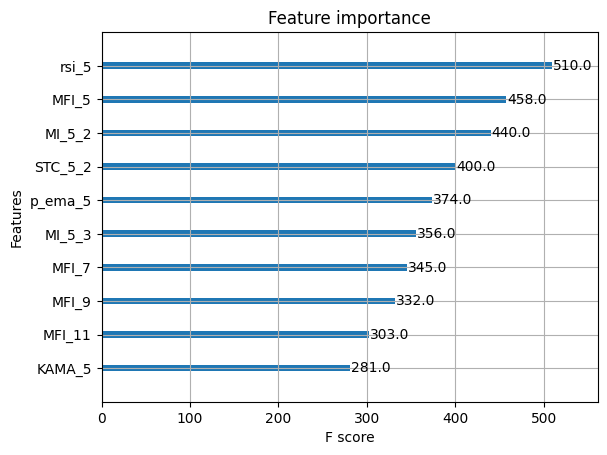

In [132]:
import sys
!{sys.executable} -m pip install ta
import os
import pandas as pd
import ta
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute

df = pd.read_csv("Resources/BTC-USD.csv")
indicator_names = []
for i in range(5,13,2):
    df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i).trix()
    df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()
    df[f'KAMA_{i}'] = (df["Close"] / ta.momentum.KAMAIndicator(close = df["Close"], window=i).kama()).round(4)

    indicator_names.append(f'rsi_{i}')
    indicator_names.append(f"MFI_{i}")
    indicator_names.append(f'p_ema_{i}')
    indicator_names.append(f"MI_{i}_2")
    indicator_names.append(f"MI_{i}_3")
    indicator_names.append(f"TRIX_{i}")
    indicator_names.append(f"STC_{i}_2")
    indicator_names.append(f'KAMA_{i}')

for i in range(35,41,2):
    df[f'rsi_{i}'] = ta.momentum.RSIIndicator(df["Close"], window= i).rsi()
    df[f"MFI_{i}"] = ta.volume.MFIIndicator(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume"], window = i, fillna = False).money_flow_index()
    df[f'p_ema_{i}'] = (df["Close"] / ta.trend.ema_indicator(close = df["Close"], window = i)).round(4)
    df[f"MI_{i}_2"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 2*i + 1, fillna = False).mass_index()
    df[f"MI_{i}_3"] = ta.trend.MassIndex(high = df["High"], low = df["Low"], window_fast = i, window_slow = 3*i + 1, fillna = False).mass_index()
    df[f"TRIX_{i}"] = ta.trend.TRIXIndicator(close = df["Close"], window = i, fillna = False).trix()
    df[f"STC_{i}_2"] = ta.trend.STCIndicator(close = df["Close"], window_fast=i, window_slow=i*2).stc()

    indicator_names.append(f'rsi_{i}')
    indicator_names.append(f"MFI_{i}")
    indicator_names.append(f'p_ema_{i}')
    indicator_names.append(f"MI_{i}_2")
    indicator_names.append(f"MI_{i}_3")
    indicator_names.append(f"TRIX_{i}")
    indicator_names.append(f"STC_{i}_2")

label(1)
df.dropna(inplace=True)
X = df[indicator_names]
y = df['Min_1_Percent_Increase']

# R0.3-S0.8-T1000-D7-F0.3
#R0.3-S0.8-T500-D5-F0.7

r=0.3
s=0.8
t=500
d=5
f=0.7

model = XGBRegressor(subsample=s, eta=r, max_depth=d, n_estimators=t, colsample_bytree=f)
model.fit(X,y)
plot_importance(model, max_num_features=10)
inputX = X.tail(5)
model.predict(inputX)

In [29]:
import json
import itertools

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

# sorting values in descending order
output = dict(sorted(feature_important.items(), key=lambda item: item[1], reverse=True))

N = 15
out = list(itertools.islice(output.keys(), N)) 

out
# printing output
print(df[out])



          rsi_5      MFI_5  Vortex_5_pos  p_ema_5    TRIX_5    STC_5_2   
63    48.946732  60.543592      0.907123   0.9943  0.291767   2.851446  \
64    32.385515  56.652359      0.868278   0.9556 -0.094843   1.425723   
65    28.655006  42.356948      0.711209   0.9571 -0.484949   0.712861   
66    31.574694  28.360209      0.693188   0.9748 -0.740531   0.356431   
67    49.752130  47.957624      0.781749   1.0102 -0.722088   2.248150   
...         ...        ...           ...      ...       ...        ...   
3512  44.940853  14.411193      0.807874   1.0002 -0.256639  50.428189   
3513  22.172868  13.930936      0.705299   0.9661 -0.415901  25.214094   
3514  15.074003  11.971656      0.554486   0.9509 -0.701943  12.607047   
3515  25.894833  30.568663      0.665005   0.9765 -0.879644   6.303524   
3516  56.149840  36.652207      0.795847   1.0255 -0.729114  15.172004   

         MI_5_3  Vortex_7_neg      MFI_7  stochrsi_5_d     MI_5_2   
63    17.142725      1.199589  63.830940  